In [1]:
import pandas as pd

In [2]:
df_sydney = pd.read_csv('data/WeatherData/IDCJAC0010_066062_1800_Data.csv')
df_perth = pd.read_csv('data/WeatherData/IDCJAC0010_009021_1800_Data.csv')

In [3]:
df_sydney['Date'] = pd.to_datetime(df_sydney['Year'].apply(str) + '-' + 
                                   df_sydney['Month'].apply(str) + '-' + 
                                   df_sydney['Day'].apply(str))
df_perth['Date'] = pd.to_datetime(df_perth['Year'].apply(str) + '-' + 
                                  df_perth['Month'].apply(str) + '-' + 
                                  df_perth['Day'].apply(str))

In [4]:
df_sydney['corr. Temp.'] = 0
df_sydney['xDate'] = 0
df_perth['corr. Temp.'] = 0
df_perth['xDate'] = 0

<AxesSubplot:>

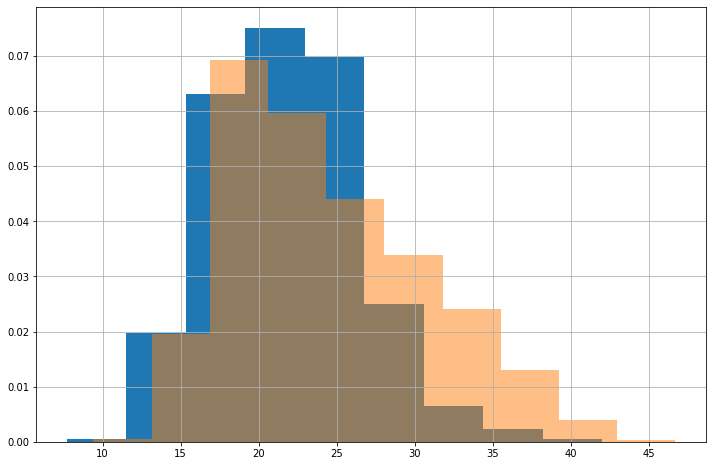

In [5]:
df_sydney['Maximum temperature (Degree C)'].hist(figsize=(12,8), density=True)
df_perth['Maximum temperature (Degree C)'].hist(alpha=0.5, density=True)

<AxesSubplot:xlabel='Date'>

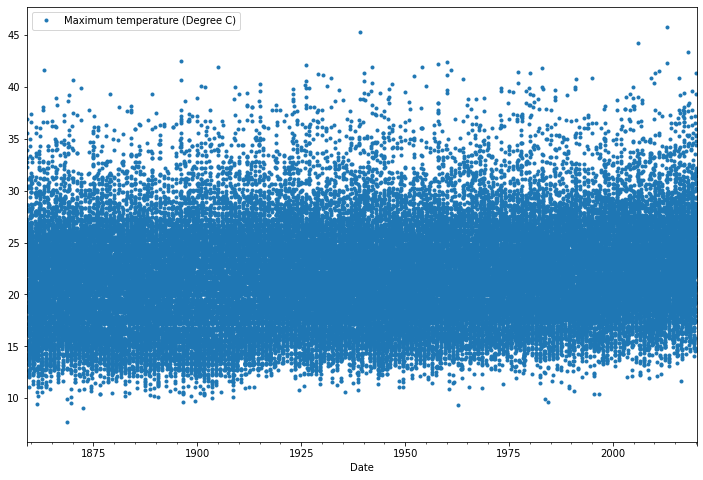

In [6]:
df_sydney.plot(x='Date', y='Maximum temperature (Degree C)', style='.', figsize=[12,8])

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
df_perth['Date'].apply(pd.Timestamp.to_julian_date)

0        2431090.5
1        2431091.5
2        2431092.5
3        2431093.5
4        2431094.5
           ...    
27804    2458894.5
27805    2458895.5
27806    2458896.5
27807    2458897.5
27808    2458898.5
Name: Date, Length: 27809, dtype: float64

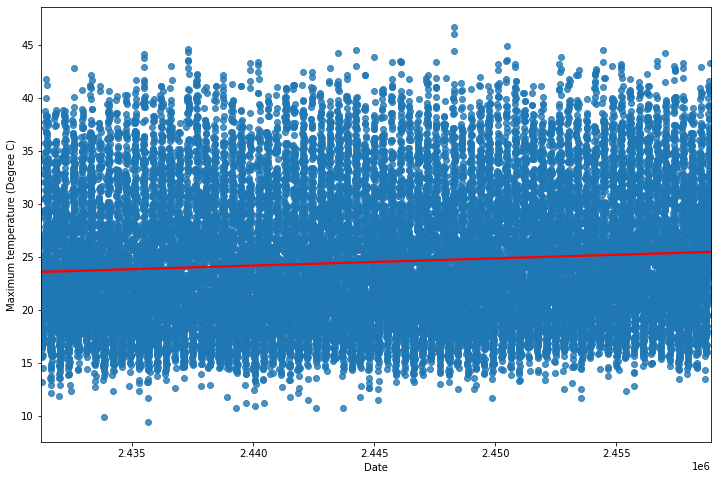

In [9]:
fig = plt.figure(figsize=[12,8])  # start a new figure with a certain size
ax = fig.gca()                    # get the figure axes

ax = sns.regplot(ax=ax, x=df_perth['Date'].apply(pd.Timestamp.to_julian_date),
                 y=df_perth['Maximum temperature (Degree C)'], line_kws={'color':'red'})

In [10]:
df_perth_1jan = df_perth.loc[(df_perth['Date'].dt.month==1)]

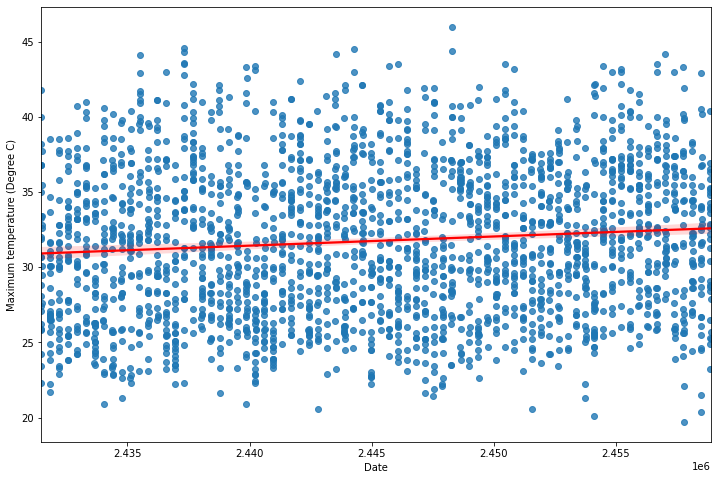

In [11]:
fig = plt.figure(figsize=[12,8])  # start a new figure with a certain size
ax = fig.gca()                    # get the figure axes

ax = sns.regplot(ax=ax, x=df_perth_1jan['Date'].apply(pd.Timestamp.to_julian_date),
                 y=df_perth_1jan['Maximum temperature (Degree C)'], line_kws={'color':'red'})

In [12]:
global_med = df_sydney['Maximum temperature (Degree C)'].mean() # global median temp.

In [13]:
 # annual variation over all times
syd_ann_var = df_sydney.groupby(['Month'])[['Maximum temperature (Degree C)']].median() 

In [14]:
df_syd_ym = df_sydney.groupby(['Year','Month'])[['Maximum temperature (Degree C)', 'corr. Temp.']].median()

In [15]:
df_syd_ym['corr. Temp.'] = df_syd_ym['Maximum temperature (Degree C)'] - \
                           syd_ann_var['Maximum temperature (Degree C)'] + global_med

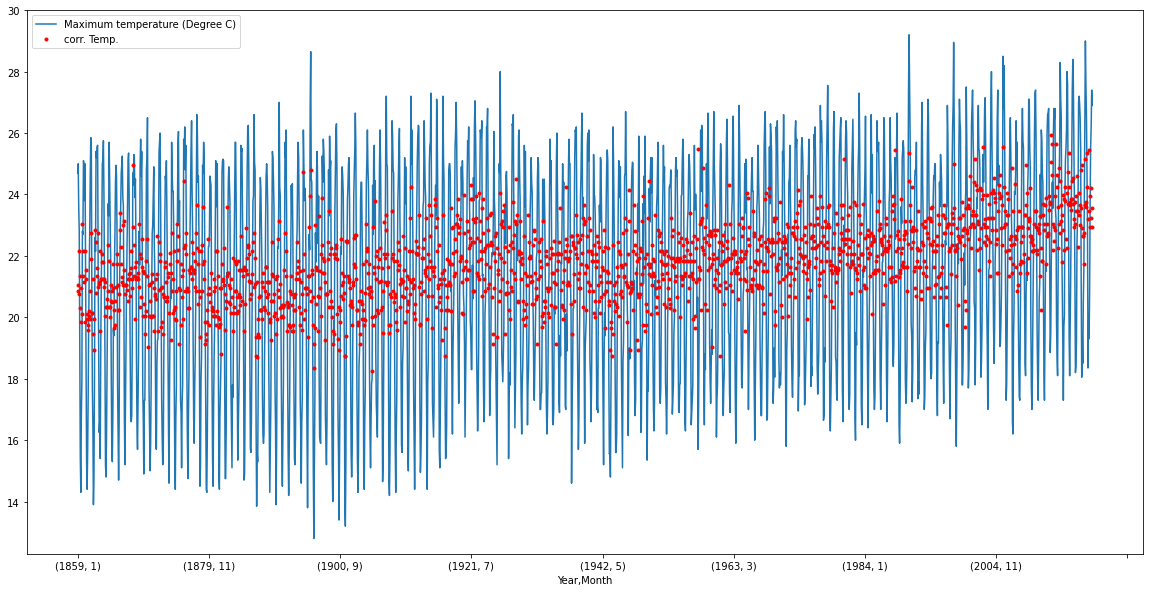

In [16]:
ax = df_sydney.groupby(['Year','Month'])[['Maximum temperature (Degree C)']].median().plot(figsize=(12,8))
_ = df_syd_ym.plot(ax=ax, color='red', y='corr. Temp.', style='.', figsize=(20,10), ylim=(12.3,30))
# _ = df_perth.groupby(['Year','Month'])[['Maximum temperature (Degree C)']].median().plot(ax=ax)

The annual variation was larger until about 1920. Also the correction is global, i.e. the curve is flattened.

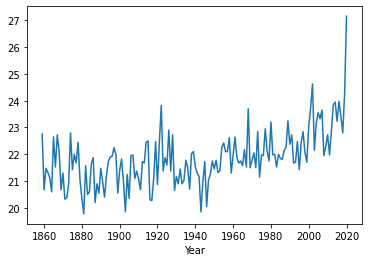

In [90]:
_ = df_syd_ym.groupby(['Year'])['Maximum temperature (Degree C)'].median().plot()  # check whether the annual correction worked

In [104]:
import matplotlib.pyplot as pt

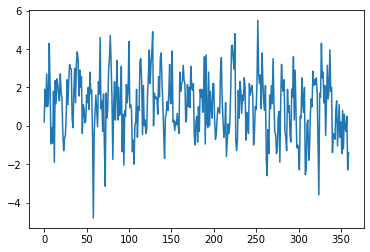

In [121]:
pt.plot(df_syd_ym.loc[1970:1999]['Maximum temperature (Degree C)'].values - \
        df_syd_ym.loc[1890:1919]['Maximum temperature (Degree C)'].values)

In [18]:
dfsg = df_sydney.groupby(['Year','Month'])[['Maximum temperature (Degree C)', 'corr. Temp.', 'xDate', 'Year', 'Month']].median()

In [19]:
dfsg['corr. Temp.'] =dfsg['Maximum temperature (Degree C)'] - syd_ann_var['Maximum temperature (Degree C)']


In [20]:
dfsg['xDate'] = dfsg['Year']+dfsg['Month']/12.

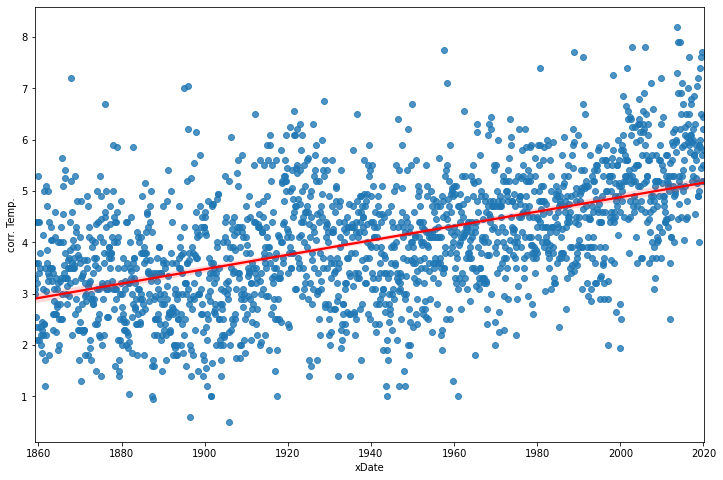

In [21]:
fig = plt.figure(figsize=[12,8])  # start a new figure with a certain size
ax = fig.gca()                    # get the figure axes

ax = sns.regplot(ax=ax, x=dfsg['xDate'], y=dfsg['corr. Temp.']+4, line_kws={'color':'red'})

In [22]:
from scipy.optimize import curve_fit

In [23]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [24]:
popt, pcov = curve_fit(func, dfsg['xDate'], dfsg['corr. Temp.']+4)

NameError: name 'np' is not defined

In [ ]:
pcov